### **Introdução**

A base de dados a ser utilizadaé composta por dados multivariados referentes à transações bancárias feitas com o cartão de crédito. Ao todo, ela é composta por 7 features, sendo elas: Distância que a transação ocorreu da casa do cliente, distância que a transação ocorreu da última transação feita, taxa de variação do valor da transação em relação à media de outras transações, se a transação foi com o mesmo varejista, se a transação usou chip do cartão, se a transação usou o número do cartão e se a transação foi um pedido online. A label nesse caso se refere a se aquela transação foi fraudulenta ou não.

O objetivo dessa análise de negócio será criar um modelo que seja capaz de detectar com um bom nível de precisão quais transações são legítimas e quais são fraudulentas. Esse modelo pode ajudar uma instituição bancária a melhorar a sua segurança e relação com os clientes ao tomar medidas estratégicas e paliativas com base no resultado deste modelo.

**Features e labels**

distancefromhome - distância em que a transação ocorreu em relação à casa do cliente (em km)

distancefromlast_transaction - distância que a transação ocorreu em relação a última transação feita pelo cliente (em km).

ratiotomedianpurchaseprice - Texa de variação do valor da transação em relação com o valor médio de transações anteriores feitas por aquele cliente.

repeat_retailer - Se a transação ocorreu no mesmo varejista que a transação anterior.
valores (1 = sim, 0 = não)

used_chip - Se foi usado o cartão de crédito.
valores (1 = sim, 0 = não)

usedpinnumber - Se a transação foi feita usando a senha do cartão
valores (1 = sim, 0 = não)

online_order - Se a transação foi uma compra online
valores (1 = sim, 0 = não)

fraud - Se a transação é fraudulenta
valores (1 = sim, 0 = não)




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


### **Análise exploratória e estatística**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
df.describe(include='all')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

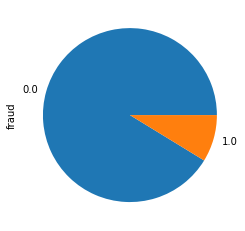

In [ ]:
df['fraud'].value_counts().plot.pie()

Como é possível observar nesse gráfico de pizza, a grande maioria das amostras são de transações legítimas.

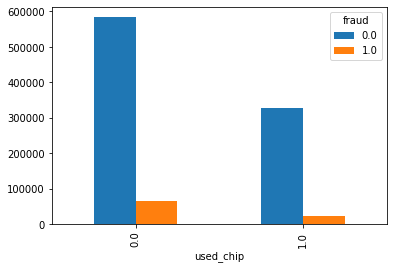

In [ ]:
df2 = pd.crosstab([df['used_chip']], df['fraud'])
df2.plot.bar()

Esse gráfico evidencia que a maioria das transações fraudulentas ocorreram sem o uso de chip

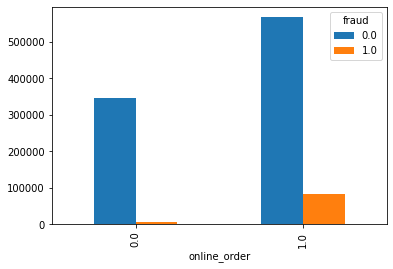

In [ ]:
df3 = pd.crosstab([df['online_order']], df['fraud'])
df3.plot.bar()

Aqui é possível observar que a grande maioria das fraudes ocorreram em um pedido online, o que pode indicar um padrão de comportamento dos fraudadores.

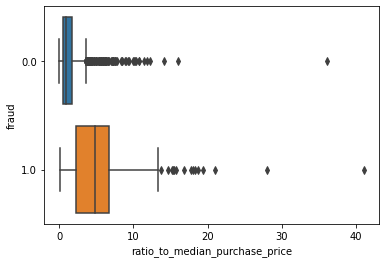

In [ ]:
sns.boxplot(data =df[:2500], x = 'ratio_to_median_purchase_price', y = 'fraud', orient = 'h')

O gráfico de boxplot mostra que amostras fraudulentas possuem muito mais outliers em relação à taxa referente a média do valor gasto por aquele cliente em uma transação. Além disso,é nítido que os valores são maiores em relações fraudulentas, ou seja, essa taxa é geralmente maior em casos de fraude. Essa taxa se refere à variação do valor da compra específica em relação a média de compras daquele mesmo cliente. Sendom assim, essa taxa pode ser um fator determinante na hora de identificar uma transação fraudulenta.

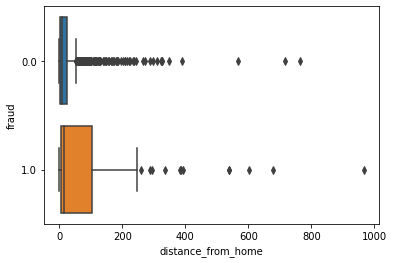

In [ ]:
sns.boxplot(data =df[:2500], x = 'distance_from_home', y = 'fraud', orient = 'h')

Nesse boxplot é possível ver também que quando uma transação é fraudulenta, a tendência é ela ser feita mais longe da casa do cliente que está sendo vítima de fraude. Isso é muito observável na quantidade de amostras presentes no terceiro quartil

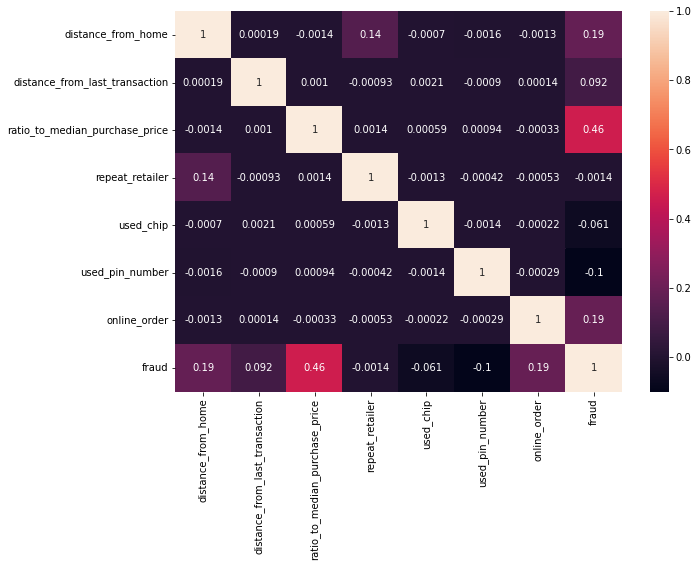

In [ ]:
fig,ax = plt.subplots(figsize = (10,7))
sns.heatmap(df.corr(),annot = True)

Aqui é possível notar que os valores com maior correlação com a transação ser fraudulenta são justamente a distância de casa, taxa de variação em relação ao valor médio, e se a compra é online ou não.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


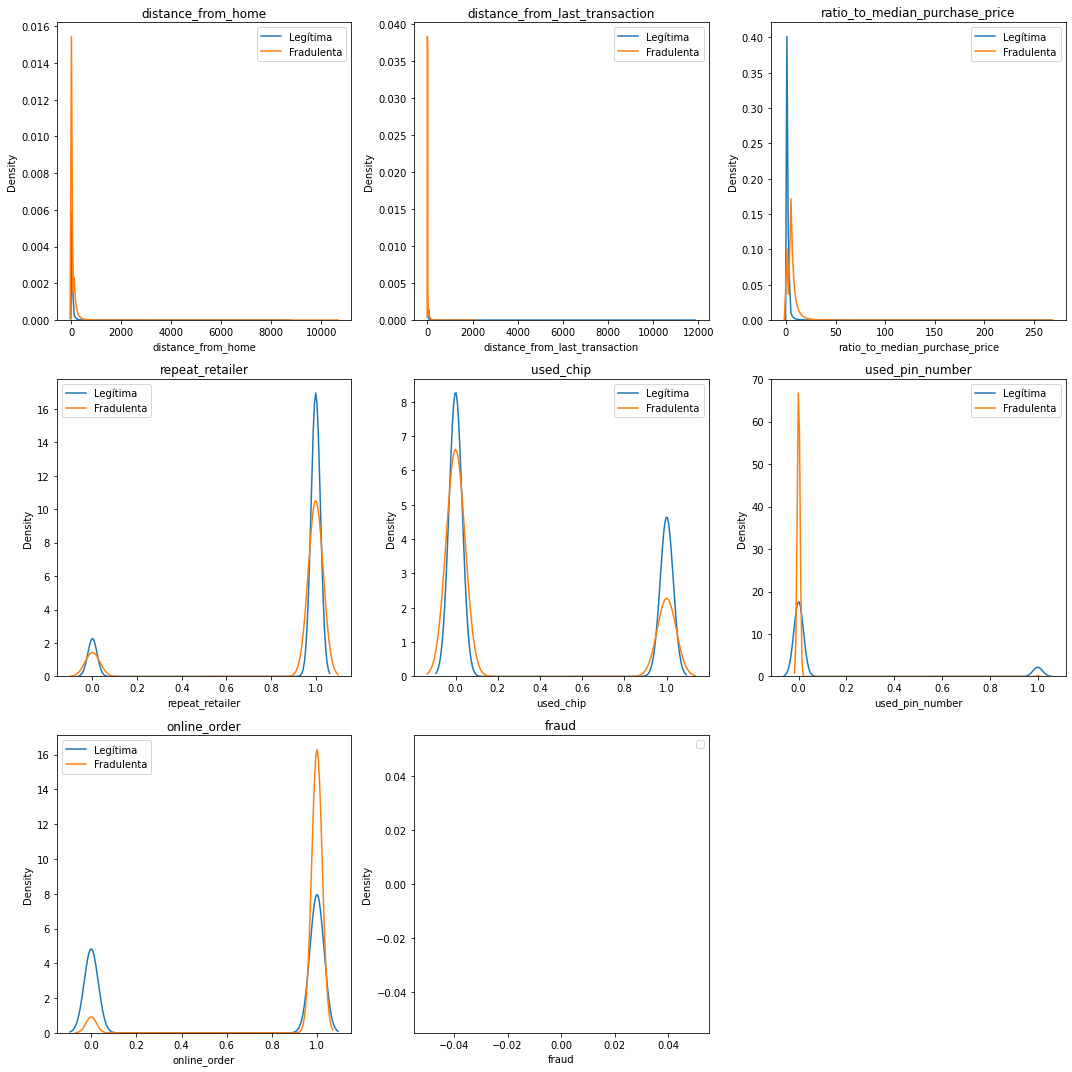

In [ ]:
legit = df.query("fraud == 0")
fraud = df.query("fraud == 1")
plt.figure(figsize = (15, 15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = legit[col], label = "Legítima")
    sns.kdeplot(x = fraud[col], label = "Fradulenta")
    plt.legend()
plt.tight_layout()

### **Árvore de decisão**

In [ ]:
from sklearn.model_selection import train_test_split
treino,teste = train_test_split(df, train_size=0.8)

Divisão dos dados em treino e teste (80% e 20% respectivamente)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']],treino['fraud'])
acurácia = modelo.score(treino[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']],treino['fraud'])
acurácia

0.9795325

Uma acurácia de 97% é o cenário ideal para o modelo. Com base nisso ele consegue prever com um alto nível de precisão quais transações são fraudulentas ou não.

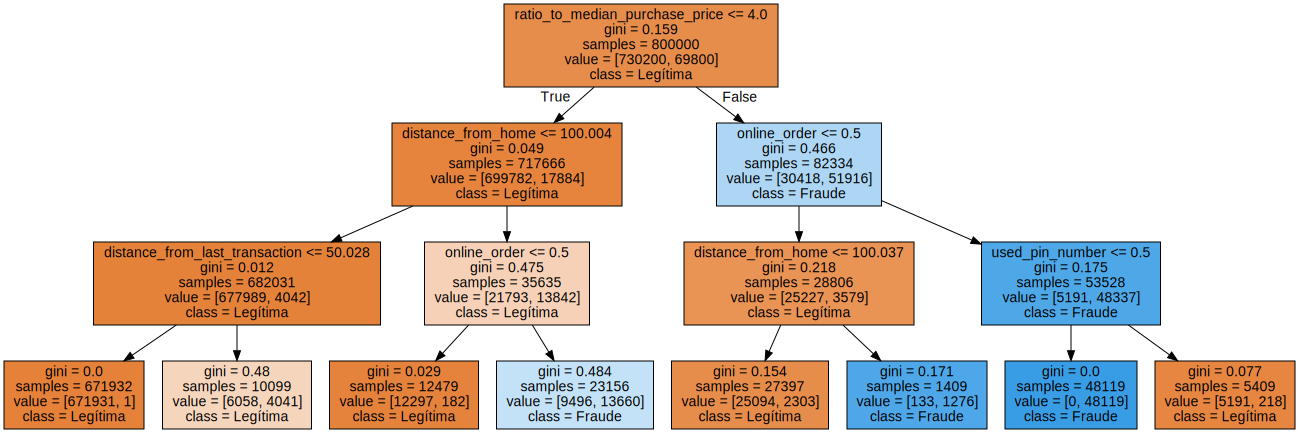

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz(
    modelo,
    filled=True,
    feature_names = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
    class_names = ['Legítima','Fraude'])
Source (dot_data)

Pontos a serem observados:

O algoritmo detectou que caso a taxa de variação do valor de transação em relação ao valor médio de outras transações for maior que 4, então existe uma grande chance daquela transação ser fraudulenta. 
Seguindo no ramo mais à direita, vemos que se essa transação também foi um pedido online, então o modelo indica que aquela transação tem mais chance ainda de ser fraudulenta. Porém, caso essa transação online tenha usado a senha do cartão então ela pode ser considerada legítima. Caso contrário, ela é considerada propensa a ser fraudulenta.
Outro fator analisado pela árvore de decisão foi a distância de casa. Caso o pedido não seja online e a transação ocorrer a mais de 100km da casa do cliente, aquela transação é considerada fraudulenta.

Agora falando do ramo mais à esquerda (em que a taxa de variação é menor que 4), vemos que se a transação ocorreu à mais de 100km da casa do cliente e foi uma transação online, ela tende muito a ser fraudulenta. Por outro lado, se não for um pedido online, o modelo aponta que ela pode ser legítima.

Além disso, quando a transação ocorrer a menos de 100km da casa do cliente, é visto que não importa se ela ocorreu a mais de 50km da última transação, já que em ambos os casos ela é considerada legítima.


In [ ]:
p_teste = modelo.predict(teste[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']])
y_teste = pd.factorize(teste['fraud'])[0]
p_teste

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
acurácia_teste = accuracy_score(p_teste, y_teste)
acurácia_teste

0.97953

Com uma acurácia de teste de 97%, pode se afirmar que não houve overfit e que o modelo é muito confiável para fazer predições baseadas nessas features.

[[179978   2419]
 [  1675  15928]]


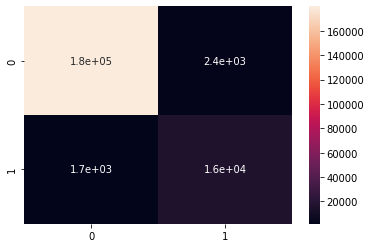

In [ ]:
cm = confusion_matrix(y_teste,p_teste)
print(cm)
sns.heatmap(cm,annot=True)

Como podemos ver na matriz de confusão, o modelo teve uma precisão muito boa de acertos. Além disso, também teve um maior número de falsos positivos do que negativos, o que no cenário tratado aqui de uma priorização para medidas de segurança é bom. Isso pode ser considerado bom pois no contexto em que a instituição bancária precisa tomar medidas de segurança (como realizar o bloqueio do cartão), é melhor que ele aponte transações legítimas como fraudulentas(FP) do que transações fraudulentas como legítimas(FN). Caso ocorra um FP, o cliente pode recorrer a instituição para revogar a decisão de bloqueio.Contudo, se ocorrer um FN, então nenhuma decisão será tomada a curto prazo e o prejuízo pode acabar sendo maior.

In [ ]:
print(classification_report(y_teste,p_teste))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    182397
           1       0.87      0.90      0.89     17603

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000



Como podemos ver, o modelo tem um pouco mais de precisão em acertar negativos do que positivos. Contudo, a diferença de precisão não é muito grande, e o fato do recall de um positivo ser de 0.90 evidencia isso.

Conclusão

Após implementar a programação do modelo e verificar o seu resultado, constatamos que ele seria muito útil no contexto do negócio. A sua alta acurácia faria a diferença na hora de tomadas de decisão rápidas (e até automatizadas). 

### **Apriori**

Antes de usar as regras de associação, é necessário categorizar colunas com valores numéricos e transformá-las em dummies.

In [ ]:
distancias_lbl = ['Muito Curta','Curta','Média','Distante','Muito distante']
distancias_bins = [0,25,50,75,100,10632]
df['distance_from_home'] = pd.cut(df['distance_from_home'],bins=distancias_bins, labels=distancias_lbl)

df['ratio_to_median_purchase_price'] = pd.cut(df['ratio_to_median_purchase_price'],bins=[0,1,2,4,8,11851], labels=['Muito Baixa','Baixa','Média','Alta','Muito alta'])


distancias1 = pd.get_dummies(df['distance_from_home'])
taxas = pd.get_dummies(df['ratio_to_median_purchase_price'])

df_apriori=pd.concat([df,distancias1,taxas],axis=1 )
df_apriori = df_apriori.drop(['distance_from_home'],axis = 1)
df_apriori = df_apriori.drop(['distance_from_last_transaction'],axis = 1)
df_apriori = df_apriori.drop(['ratio_to_median_purchase_price'],axis = 1)
df_apriori = df_apriori.drop(['repeat_retailer'],axis = 1)
df_apriori.head()

,used_chip,used_pin_number,online_order,fraud,Muito Curta,Curta,Média,Distante,Muito distante,Muito Baixa,Baixa,Média,Alta,Muito alta
0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0
2,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0,0
3,1.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0,0
4,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0


Com todas as features transformadas em dummies, é hora de usar o modelo de apriori

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
association_rules(apriori(df_apriori, min_support=0.03,use_colnames=True))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fraud),(online_order),0.087403,0.650552,0.082711,0.946318,1.454638,0.025851,6.509549
1,"(Muito Curta, fraud)",(online_order),0.051603,0.650552,0.048840,0.946457,1.454852,0.015270,6.526444
2,"(Alta, fraud)",(online_order),0.046680,0.650552,0.043477,0.931384,1.431682,0.013109,5.092798
3,"(Alta, online_order)",(fraud),0.048127,0.087403,0.043477,0.903381,10.335808,0.039271,9.445281
4,"(Alta, Muito Curta, fraud)",(online_order),0.034118,0.650552,0.032151,0.942347,1.448535,0.009955,6.061244
5,"(Alta, Muito Curta, online_order)",(fraud),0.035705,0.087403,0.032151,0.900462,10.302417,0.029030,9.168339


Com cerca de 3% de suporte, o modelo de apriori detectou uma série de associações interessantes:
- Em casos de transações fraudulentas, muitos ocorreram em compras online. Isso também foi algo destacado em alguns dos ramos da árvore de decisão, ou seja, os dois modelos detectaram o mesmo fenômeno em comum.
- Quando os antecedentes fraudulentos ocorrerem à uma distância muito curta da residência do cliente, o modelo de apriori também detectou uma associação que existe uma boa chance de isso ter sido uma compra online, algo que não foi destacado pela árvore de decisão
- Uma alta taxa de variação presente com um caso de fraude também foi associada com uma compra online: A árvore de decisão detectou algo parecido em um de seus ramos. Além disso, o modelo de apriori também detectou que uma alta de taxa de variação junto de uma compra online também significam um alto risco de ser fraude.
- No geral, as demais regras de associação que não comentei aqui são muito parecidas. O importante a se destacar aqui, é que todas elas tiveram uma confiança de mais de 90%. Além disso, grande parte das regras detectadas aqui também foram explicitadas pela árvore de decisão, o que enfatiza mais ainda a eficiência desse algoritmo.  